# Se aplicará un algoritmos no supervisado Kmeans para agrupar los datos de la estadística utilizada. Se analizará con el resultado si las regiones son un buen separador de características considerando el análisis de ocurrencia de enfermedades 


In [46]:
#importamos librerías

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [48]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

In [49]:
#conjunto de datos sin las 3 columnas target y sin ID

X1 = df.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
X1.shape

(25637, 97)

In [50]:
# Estandariza los datos
scaler = StandardScaler()
X = scaler.fit_transform(X1)

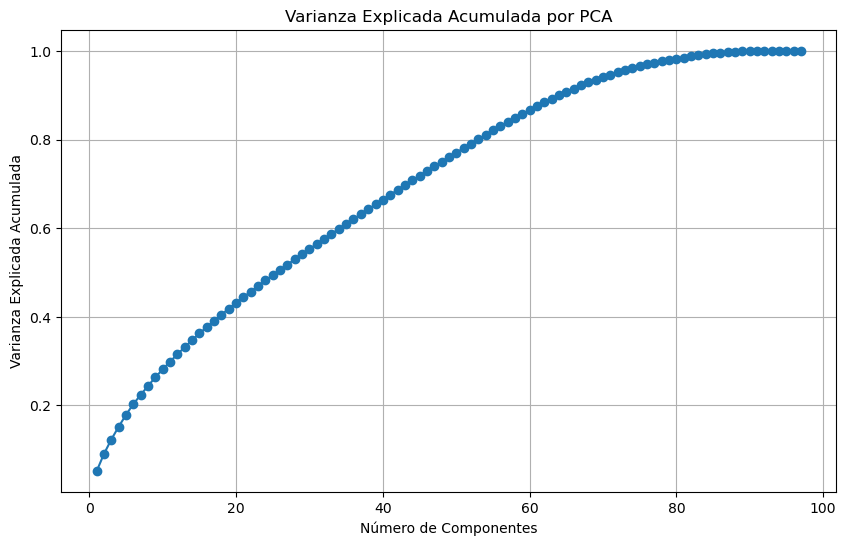

Para alcanzar al menos el 80% de la varianza explicada, se necesitan 53 componentes.


In [51]:
# Inicializar PCA
pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X)


# Verificar la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


# Graficar la varianza explicada acumulada para decidir el número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada acumulada con un límite de 80% o más
componentes_para_80 = np.argmax(varianza_explicada_acumulada >= 0.80) + 1
print(f"Para alcanzar al menos el 80% de la varianza explicada, se necesitan {componentes_para_80} componentes.")

In [52]:
# Reduccion de dimensionalidad

pca = PCA(n_components=53)  # Selecciona el número de componentes principales
X_pca = pca.fit_transform(X)

In [53]:

# Se añade la información de los componentes principales al DataFrame original
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                      'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 
                                      'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 
                                      'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 
                                      'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 
                                      'PC50', 'PC51', 'PC52', 'PC53'])
df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [54]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,3.746456,1.238261,-0.729881,3.507835,-0.041422,1.052211,1.732879,-1.938124,-0.372889,-1.064499,...,-0.752259,1.066790,-0.474118,0.242418,-0.069890,-0.288233,0.260731,-0.467261,0.089437,0.350047
1,2.234996,2.911960,0.859909,1.524255,0.798048,1.125091,-2.785488,-1.830651,3.387462,1.714442,...,0.111501,0.678043,0.577036,0.168792,0.875297,0.675969,0.680025,-0.528392,0.085338,0.143110
2,1.769240,2.442819,0.622286,0.171783,-2.141978,-1.539189,-1.423770,-2.239648,1.477321,-0.391873,...,-0.308596,0.990145,-0.635625,-0.739305,-1.060902,-0.481196,-0.715068,0.702739,-1.074482,-0.363781
3,-2.795834,2.929820,0.809400,1.545189,-2.974181,-0.433662,-0.812858,-0.792705,1.922566,-1.094074,...,-1.460759,-1.247938,-0.096182,-0.736562,0.110647,-0.445758,-2.486085,0.646505,-0.430177,0.977263
4,2.031791,0.916857,1.796401,0.310476,-2.450847,-2.062346,2.500977,-1.366011,1.155379,0.029672,...,-0.928723,0.187124,0.428739,-0.294693,-1.712076,0.903227,-0.169192,0.453743,-1.587706,0.249354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.321085,-2.067718,-0.854515,-1.930052,-2.005825,0.901957,-0.720097,-0.510823,0.605468,2.517229,...,-0.645792,-1.701389,-0.216519,2.163008,-0.852162,-0.250455,1.255847,1.769195,-0.378357,-2.273913
25633,-1.154731,1.065746,2.052958,0.826532,2.150911,-0.367945,-1.034853,0.191819,-1.631831,0.879833,...,-0.120033,-0.451569,0.244077,-0.381878,0.074823,0.257949,-0.464096,0.035666,-0.480580,0.360606
25634,1.303522,1.512019,0.909295,-1.922975,-0.947442,2.129620,-1.721111,3.039062,-1.080708,-0.437276,...,-1.534095,-0.167676,-0.016182,0.204302,-1.869555,-0.240059,0.420212,-0.178280,0.109920,-0.611182
25635,1.753011,0.210745,0.357628,-1.713915,0.622430,-0.887707,-2.450941,3.007948,-0.015980,1.608712,...,-0.773623,-0.727365,-0.248450,-0.677143,-0.884356,-0.391496,-0.696867,0.266657,0.152146,-0.310548


In [55]:
# Imprimir la varianza explicada por cada componente principal
print('Varianza explicada')
for i in range(53):
    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

Varianza explicada
PC1: 0.05148129527154067
PC2: 0.039150926541858366
PC3: 0.03245293456132263
PC4: 0.02886964016702939
PC5: 0.026800913742449306
PC6: 0.02440304684536927
PC7: 0.020728091075091163
PC8: 0.020155459965805003
PC9: 0.019654160218238573
PC10: 0.017812198157716654
PC11: 0.017339767958764768
PC12: 0.01671280233517041
PC13: 0.016055937385896158
PC14: 0.0157299516248539
PC15: 0.015126758713891346
PC16: 0.014414414242307265
PC17: 0.01402501861031125
PC18: 0.01382129851697616
PC19: 0.013628686957056085
PC20: 0.013199434556119398
PC21: 0.01279109901026948
PC22: 0.012611677940954061
PC23: 0.012527287617287459
PC24: 0.01242044579013596
PC25: 0.012019517740328202
PC26: 0.011966548038591615
PC27: 0.01180057462138353
PC28: 0.011771910349093839
PC29: 0.011630870824855354
PC30: 0.011551395892199737
PC31: 0.011438046381101408
PC32: 0.011286688294359122
PC33: 0.011247339415177682
PC34: 0.011180862245855903
PC35: 0.011115847847042108
PC36: 0.011064249587586368
PC37: 0.010969130970807796
PC3

In [56]:

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(varianza_acumulada)

[0.0514813  0.09063222 0.12308516 0.1519548  0.17875571 0.20315876
 0.22388685 0.24404231 0.26369647 0.28150867 0.29884843 0.31556124
 0.33161717 0.34734713 0.36247388 0.3768883  0.39091332 0.40473462
 0.4183633  0.43156274 0.44435384 0.45696551 0.4694928  0.48191325
 0.49393277 0.50589931 0.51769989 0.5294718  0.54110267 0.55265407
 0.56409211 0.5753788  0.58662614 0.597807   0.60892285 0.6199871
 0.63095623 0.64191304 0.65285551 0.66372686 0.67453434 0.68531341
 0.69600947 0.70665324 0.71724393 0.72770187 0.73810579 0.74838037
 0.75861855 0.76880692 0.77890336 0.78880828 0.79870477]


### Se observa que la suma acumulada de los primeros 53 componentes explica mas del 80% de los datos
    

# Analisis de las cargas variables que afectan cada componente en mayor medida

In [57]:
# Cargas de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(53)], index=X1.columns)

In [58]:

# Filtrar las cargas que tengan una magnitud mayor al umbral (0.1 para un 10%)
threshold = 0.3
loadings_filtered = loadings[(loadings.abs() >= threshold).any(axis=1)]

# Mostrar las cargas filtradas
print(loadings_filtered)

                                         PC1       PC2       PC3       PC4  \
tamanio_aglomerado_2                0.023892  0.024347  0.026480  0.023140   
tamanio_aglomerado_4               -0.053469 -0.050976 -0.025250 -0.055260   
tipo_vivienda_2                    -0.006284 -0.070172  0.003530 -0.054341   
tipo_vivienda_5                     0.015971  0.005868  0.005998 -0.002642   
tipo_vivienda_6                    -0.001799 -0.004922  0.007688 -0.004714   
...                                      ...       ...       ...       ...   
consumo_regular_riesgo             -0.043812  0.003974 -0.091806 -0.034336   
consumido_alcohol_99               -0.000945 -0.003956  0.007817  0.014281   
familiares_directos_diabetes_99    -0.013728 -0.019764  0.036543 -0.049488   
familiares_no_directos_diabetes_2  -0.019540  0.048388 -0.031020 -0.013507   
familiares_no_directos_diabetes_99 -0.025577  0.009612  0.057697 -0.068275   

                                         PC5       PC6       PC

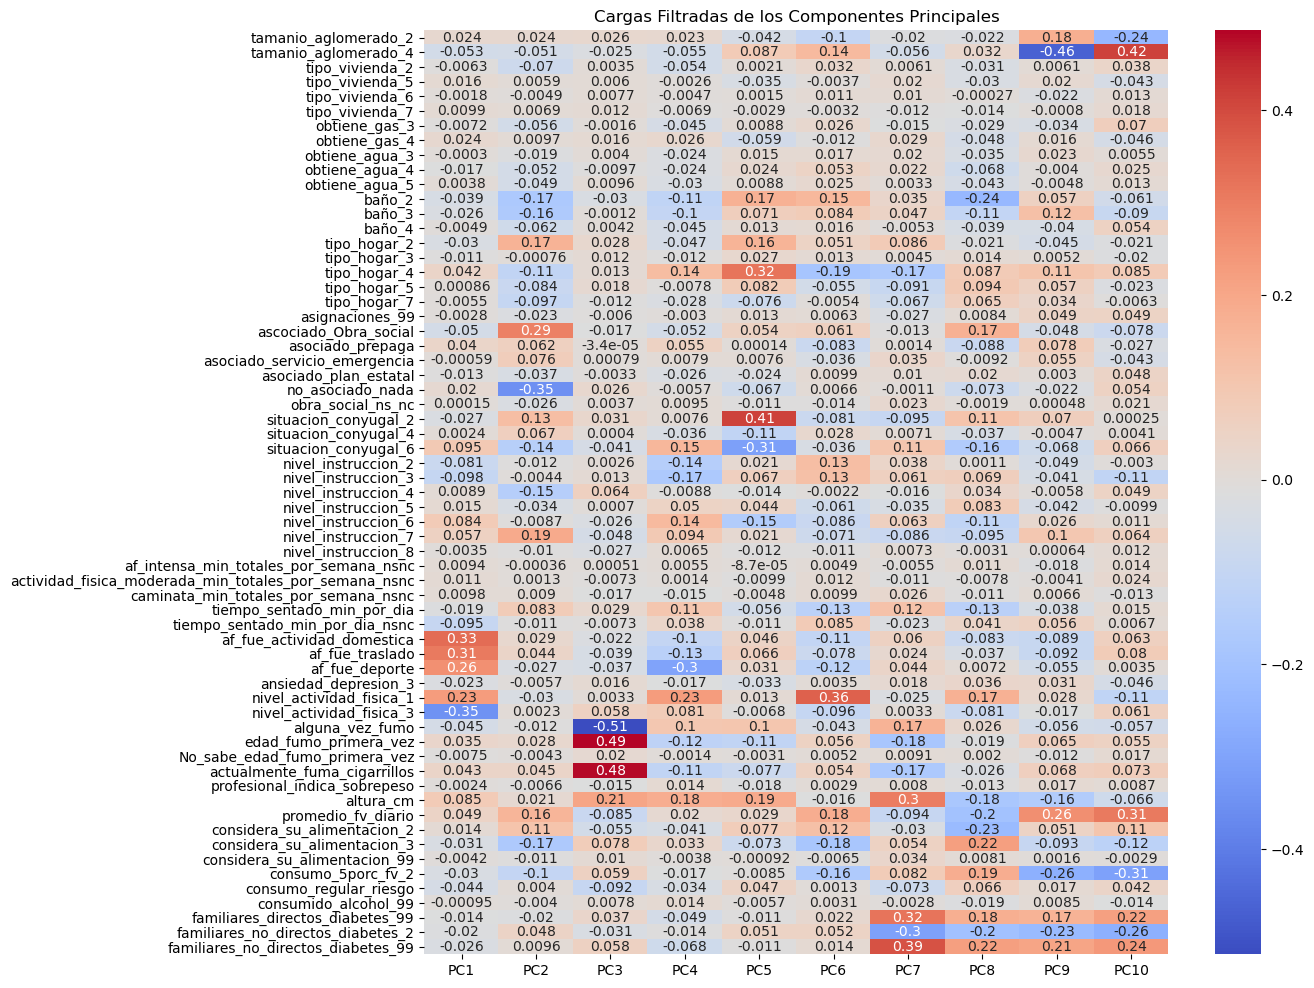

In [59]:
columnas_primeras = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12, 12))
sns.heatmap(loadings_filtered[columnas_primeras], annot=True, cmap='coolwarm')
plt.title('Cargas Filtradas de los Componentes Principales')
plt.show()

# Aplicamos método Elbow para determinar cantidad óptima de clusters

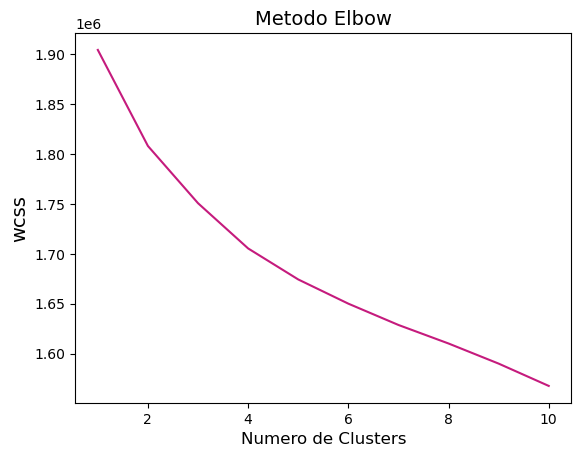

In [60]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_df)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
#plt.gca().spines["top"].set_visible(False)
#plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()


# El codo se encuentra entre 2 y 4 clusters. 3 sería el punto central.

# Análisis de Silouette

In [61]:
from sklearn.metrics import silhouette_score

In [62]:

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(pca_df)
    labels = kmeans.labels_
    sil.append(silhouette_score(pca_df, labels, metric='euclidean'))

    
print("fin silouette")    
    
# Análisis de Silueta
#for n in range(2, 11):
#    kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
#    labels = kmeans.fit_predict(X_pca)
#    silhouette_avg = silhouette_score(X_pca, labels)
#    print(f'Número de clusters: {n}, Score de Silueta: {silhouette_avg}')

fin silouette


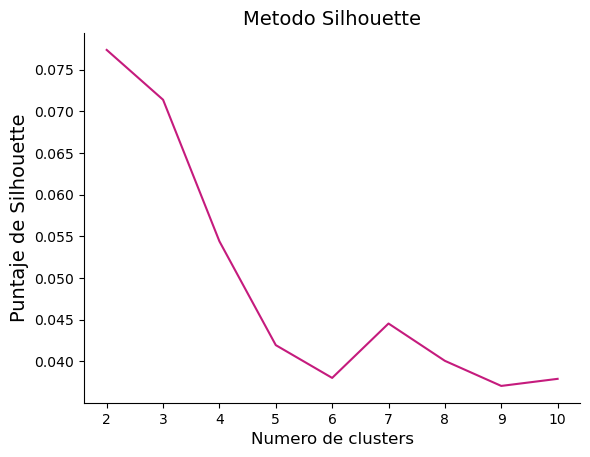

In [63]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [64]:
# Análisis de Silueta
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    print(f'Número de clusters: {n}, Score de Silueta: {silhouette_avg}')

Número de clusters: 2, Score de Silueta: 0.07736987856075281
Número de clusters: 3, Score de Silueta: 0.05695272498556863
Número de clusters: 4, Score de Silueta: 0.054377974393619063
Número de clusters: 5, Score de Silueta: 0.04181431891318497
Número de clusters: 6, Score de Silueta: 0.042614447741282264
Número de clusters: 7, Score de Silueta: 0.047424583478503854
Número de clusters: 8, Score de Silueta: 0.03890673468566942
Número de clusters: 9, Score de Silueta: 0.043360266859724494
Número de clusters: 10, Score de Silueta: 0.04332147574647229


### De acuerdo a los resultados de silueta ninguno de las formas de agrupamiento resulta muy buena ya que todos los niveles están muy cerca de 0, cuando idealmente deberían estar cerca de 1. utilizaremos el criterio obtenido mediante el método elbow agrupando en 3 clusters

In [65]:
# Ahora aplica KMeans a los datos reducidos agrupando en 3 clusters

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(pca_df)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [66]:

# Agrega los labels al DataFrame original
pca_df['Cluster'] = kmeans.labels_

In [67]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,Cluster
0,3.746456,1.238261,-0.729881,3.507835,-0.041422,1.052211,1.732879,-1.938124,-0.372889,-1.064499,...,1.066790,-0.474118,0.242418,-0.069890,-0.288233,0.260731,-0.467261,0.089437,0.350047,0
1,2.234996,2.911960,0.859909,1.524255,0.798048,1.125091,-2.785488,-1.830651,3.387462,1.714442,...,0.678043,0.577036,0.168792,0.875297,0.675969,0.680025,-0.528392,0.085338,0.143110,1
2,1.769240,2.442819,0.622286,0.171783,-2.141978,-1.539189,-1.423770,-2.239648,1.477321,-0.391873,...,0.990145,-0.635625,-0.739305,-1.060902,-0.481196,-0.715068,0.702739,-1.074482,-0.363781,1
3,-2.795834,2.929820,0.809400,1.545189,-2.974181,-0.433662,-0.812858,-0.792705,1.922566,-1.094074,...,-1.247938,-0.096182,-0.736562,0.110647,-0.445758,-2.486085,0.646505,-0.430177,0.977263,2
4,2.031791,0.916857,1.796401,0.310476,-2.450847,-2.062346,2.500977,-1.366011,1.155379,0.029672,...,0.187124,0.428739,-0.294693,-1.712076,0.903227,-0.169192,0.453743,-1.587706,0.249354,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.321085,-2.067718,-0.854515,-1.930052,-2.005825,0.901957,-0.720097,-0.510823,0.605468,2.517229,...,-1.701389,-0.216519,2.163008,-0.852162,-0.250455,1.255847,1.769195,-0.378357,-2.273913,1
25633,-1.154731,1.065746,2.052958,0.826532,2.150911,-0.367945,-1.034853,0.191819,-1.631831,0.879833,...,-0.451569,0.244077,-0.381878,0.074823,0.257949,-0.464096,0.035666,-0.480580,0.360606,1
25634,1.303522,1.512019,0.909295,-1.922975,-0.947442,2.129620,-1.721111,3.039062,-1.080708,-0.437276,...,-0.167676,-0.016182,0.204302,-1.869555,-0.240059,0.420212,-0.178280,0.109920,-0.611182,1
25635,1.753011,0.210745,0.357628,-1.713915,0.622430,-0.887707,-2.450941,3.007948,-0.015980,1.608712,...,-0.727365,-0.248450,-0.677143,-0.884356,-0.391496,-0.696867,0.266657,0.152146,-0.310548,1


In [68]:
# Calcular la varianza dentro de cada cluster para cada componente principal
variance_within_cluster = pca_df.groupby('Cluster').var()

print(variance_within_cluster)

              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Cluster                                                                         
0        1.813125  3.565841  0.500375  2.578019  2.389663  2.351763  1.684485   
1        1.765799  3.782087  0.605833  2.479894  2.500072  2.451792  1.902665   
2        0.442976  3.436578  3.108859  1.293375  2.316358  1.446391  2.000869   

              PC8       PC9      PC10  ...      PC44      PC45      PC46  \
Cluster                                ...                                 
0        1.906948  1.776960  1.638604  ...  0.862197  0.809231  0.802941   
1        1.981385  1.865005  1.719638  ...  1.239593  1.152205  1.124385   
2        1.544719  1.744334  1.494860  ...  0.676402  0.961856  0.973173   

             PC47      PC48      PC49      PC50      PC51      PC52      PC53  
Cluster                                                                        
0        0.777866  1.047573  0.917185  0.954018  0.95

In [81]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts = pca_df['Cluster'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts)

1    11009
0     9877
2     4751
Name: Cluster, dtype: int64


### Se observa que el cluster 0 tienen 11008  datos, el cluster 1 tienen casi 10000 y el cluster 2 4750

In [82]:
from mpl_toolkits.mplot3d import Axes3D  # Necesario para crear gráficos 3D

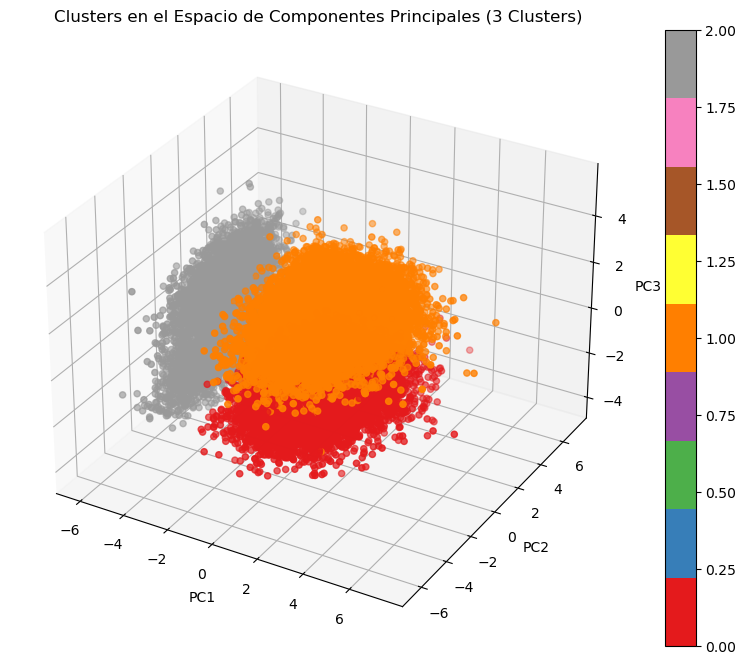

In [83]:

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los clusters en un gráfico 3D
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='Set1')

# Agregar etiquetas a los ejes y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters en el Espacio de Componentes Principales (3 Clusters)')

# Agregar una barra de color para mostrar los clusters
plt.colorbar(sc)

# Mostrar la gráfica
plt.show()

## Se analizará la relación entre los clusters generados  y las regiones 

In [84]:
#vemso la distribucion de cada cluster en función de la region

# Ver la distribución de las regiones dentro de cada cluster
cluster_region_distribution = pd.crosstab(pca_df['Cluster'], df['region'])
print(cluster_region_distribution)

region      1     2     3     4     5     6
Cluster                                    
0        1255  3258  1755  1561   889  1159
1        1599  3463  1953  1082  1125  1787
2         383  1563   949   876   339   641


In [85]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}


In [86]:
#agregamos los nombres de las regiones apra identificar mejor

cluster_region_distribution = cluster_region_distribution.rename(columns=region_dict)
print(cluster_region_distribution)

region   Metropolitana  Pampeana  Noroeste  Noreste  Cuyo  Patagónica
Cluster                                                              
0                 1255      3258      1755     1561   889        1159
1                 1599      3463      1953     1082  1125        1787
2                  383      1563       949      876   339         641


### Para una mejor interpretación encontraremos el porcentaje de datos cada región en cada cluster  

In [87]:
    #Calcula el total de datos en cada region
#total_por_cluster = cluster_region_distribution.sum(axis=1)
#print(total_por_cluster)

total_por_region =  cluster_region_distribution.sum(axis=0)
print(total_por_region)

region
Metropolitana    3237
Pampeana         8284
Noroeste         4657
Noreste          3519
Cuyo             2353
Patagónica       3587
dtype: int64


In [88]:

# Calcula el porcentaje de datos por región en cada cluster
#cluster_region_percentage = cluster_region_distribution.div(total_por_cluster, axis=0) * 100

region_percentage = cluster_region_distribution.div(total_por_region, axis=1) * 100
print(region_percentage)


region   Metropolitana   Pampeana   Noroeste    Noreste       Cuyo  Patagónica
Cluster                                                                       
0            38.770466  39.328827  37.685205  44.359193  37.781555   32.311124
1            49.397590  41.803477  41.936869  30.747371  47.811305   49.818790
2            11.831943  18.867697  20.377926  24.893436  14.407140   17.870086


## Conclusión
### Se observa que en función de la región los clusters realmente no establecen una diferencia importante. Se probará con otro tipo de algoritmo